In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [3]:
import sys
sys.path.append("../")

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
from keras.models import load_model

/home/hseto/.pyenv/versions/3.5.2/envs/performance/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
from collections import OrderedDict

In [8]:
model_path = "../log/prune_0.9/last_model.hdf5"

In [9]:
X_train = np.load("../data/cifar10/X_train.npy")

In [10]:
mean = X_train.mean(axis=(0, 1, 2))
std = X_train.std(axis=(0, 1, 2))

In [11]:
X_test = np.load("../data/cifar10/X_test.npy")
y_test = np.load("../data/cifar10/y_test.npy")

In [12]:
y_test = y_test.ravel()

In [13]:
X_test = (X_test - mean) / std

In [14]:
model = load_model(model_path)

In [37]:
pred_prob = model.predict(X_test)

In [45]:
pred = np.argmax(pred_prob, axis=-1)

In [58]:
acc = np.sum(pred == y_test) / len(y_test) * 100

In [59]:
print("After Prune Acc: {0:0.3f}".format(acc))

After Prune Acc: 94.980


In [16]:
layers = model.layers

In [17]:
weights_map = OrderedDict()

In [18]:
for lay in layers:
    name = lay.name
    if "conv" in name:
        weights_map[name] = lay.get_weights()[0]

In [19]:
key_ = list(weights_map.keys())[0]

In [20]:
count = 0
for key in weights_map.keys():
    val = weights_map[key]
    count += len(val.ravel())

In [21]:
count

36454832

reshapeは(ichxwxh, och)の形で出力．  

weights shape: (3, 3, 3, 16)


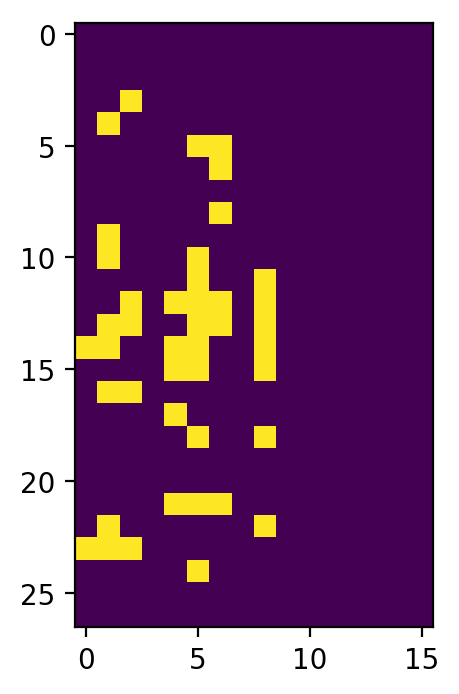

weights shape: (3, 3, 16, 160)


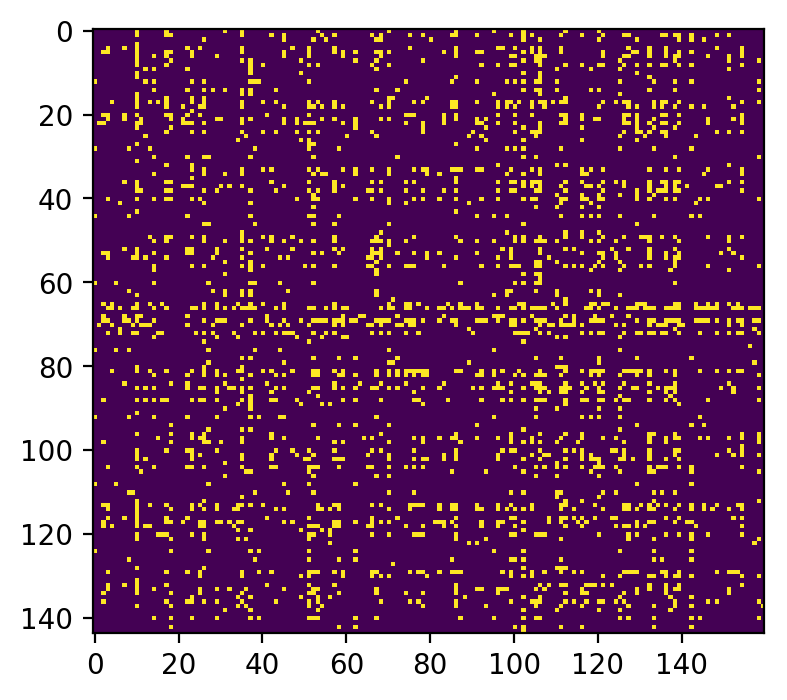

weights shape: (3, 3, 160, 160)


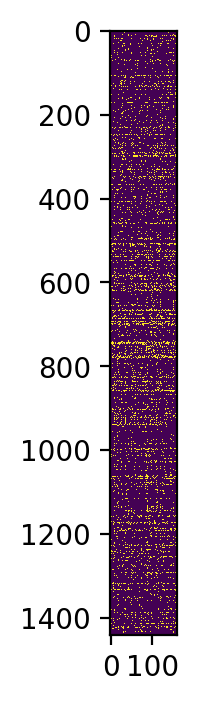

weights shape: (1, 1, 16, 160)


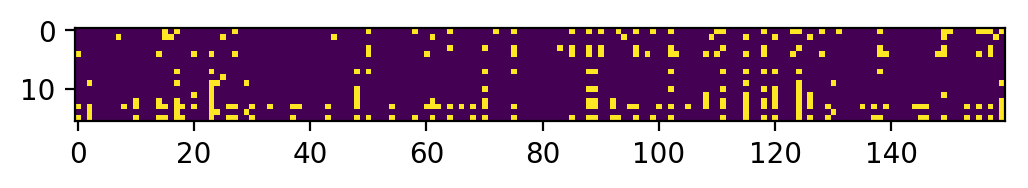

weights shape: (3, 3, 160, 160)


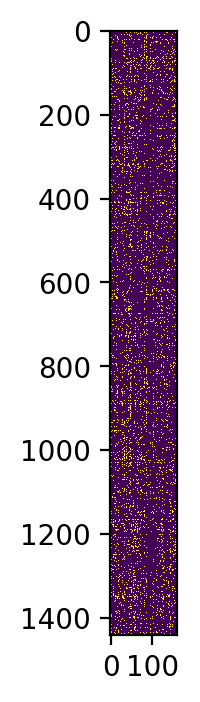

weights shape: (3, 3, 160, 160)


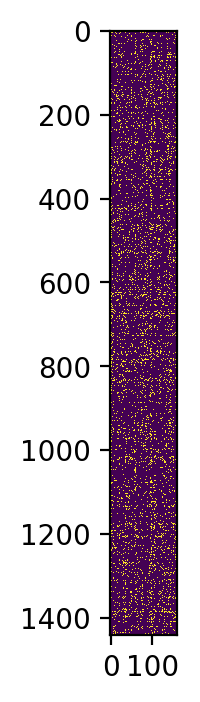

weights shape: (3, 3, 160, 160)


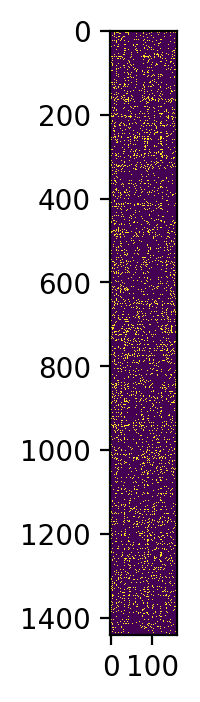

weights shape: (3, 3, 160, 160)


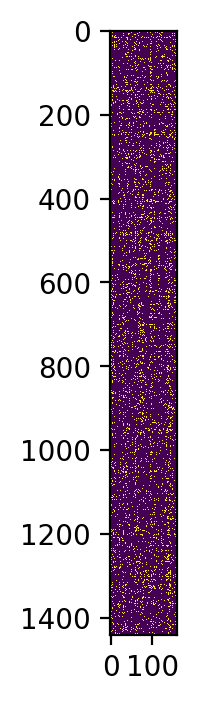

weights shape: (3, 3, 160, 160)


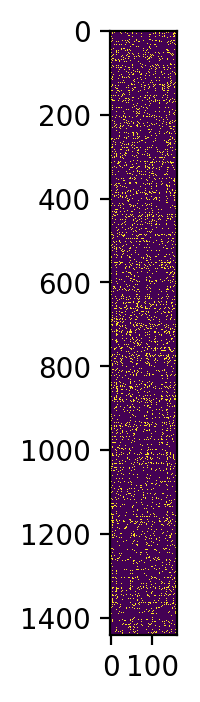

weights shape: (3, 3, 160, 160)


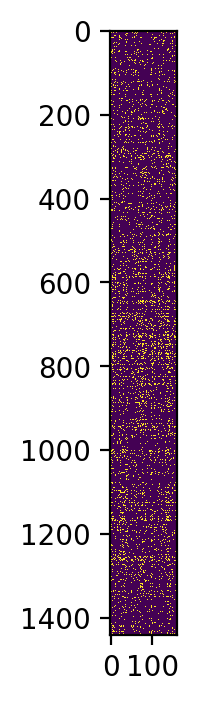

weights shape: (3, 3, 160, 320)


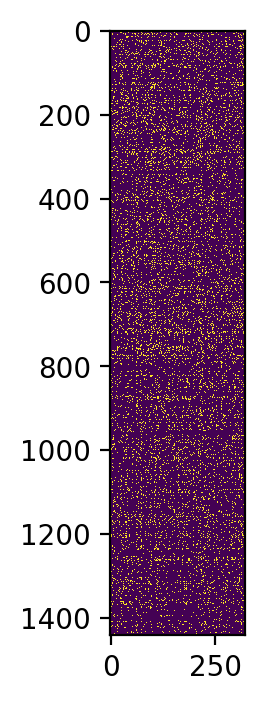

weights shape: (3, 3, 320, 320)


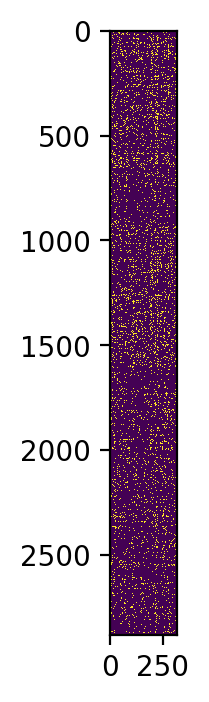

weights shape: (1, 1, 160, 320)


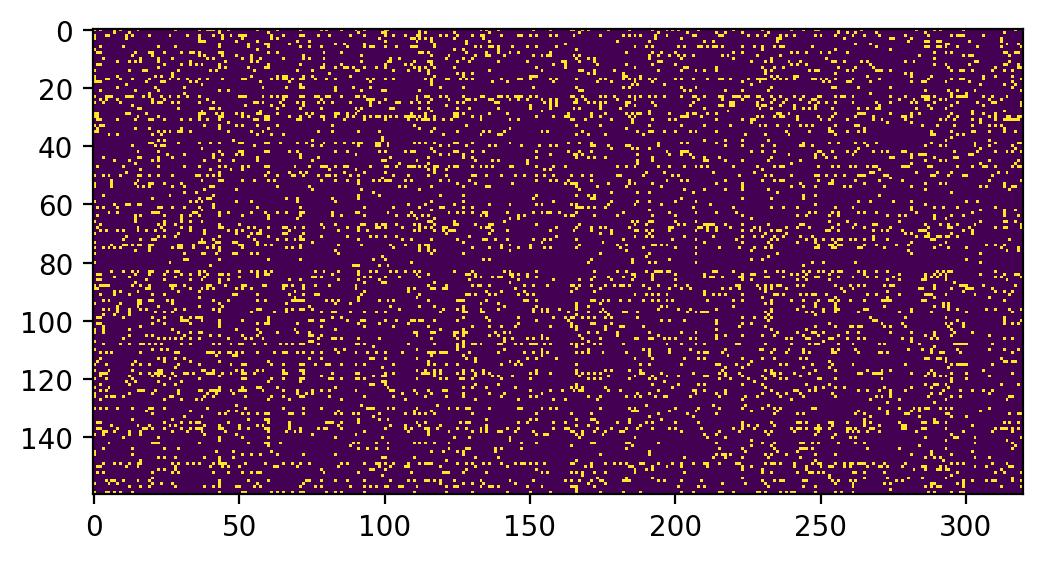

weights shape: (3, 3, 320, 320)


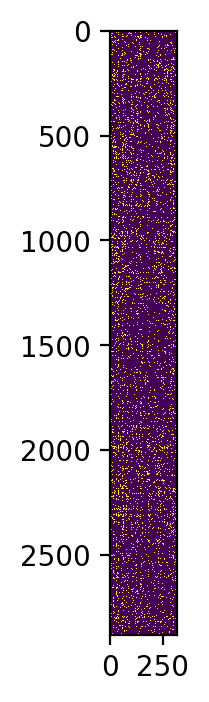

weights shape: (3, 3, 320, 320)


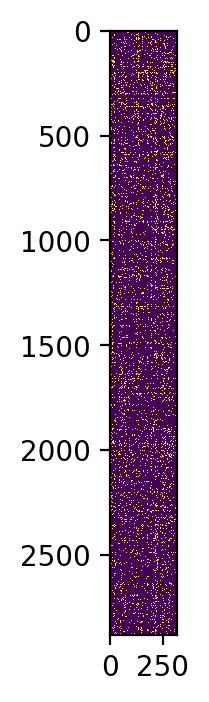

weights shape: (3, 3, 320, 320)


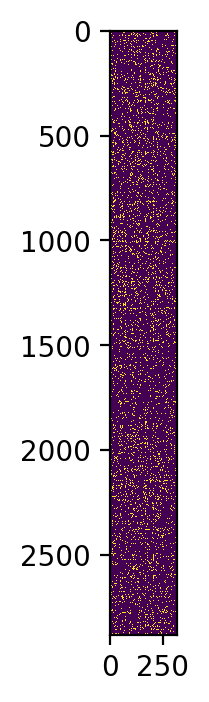

weights shape: (3, 3, 320, 320)


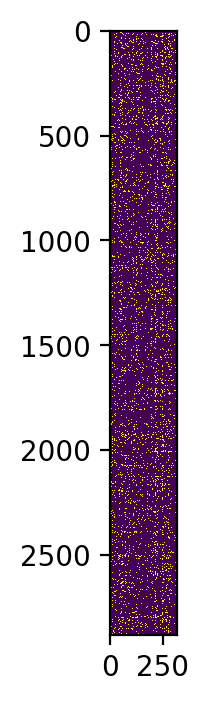

weights shape: (3, 3, 320, 320)


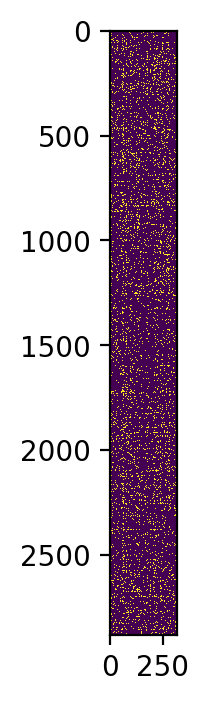

weights shape: (3, 3, 320, 320)


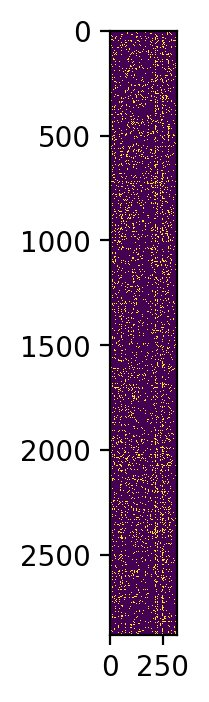

weights shape: (3, 3, 320, 640)


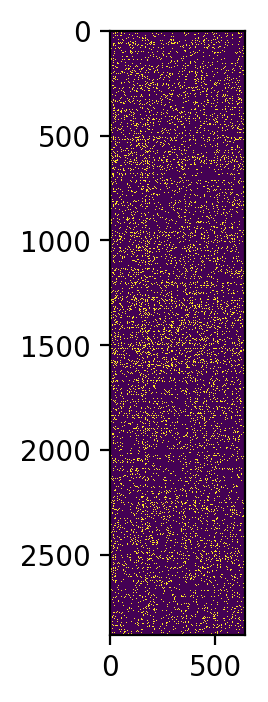

weights shape: (3, 3, 640, 640)


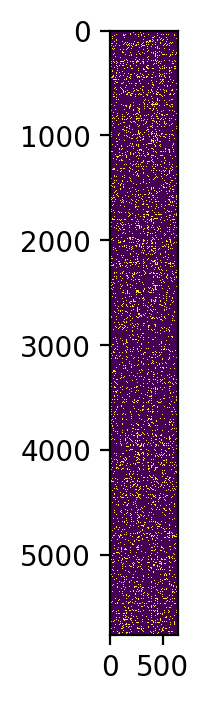

weights shape: (1, 1, 320, 640)


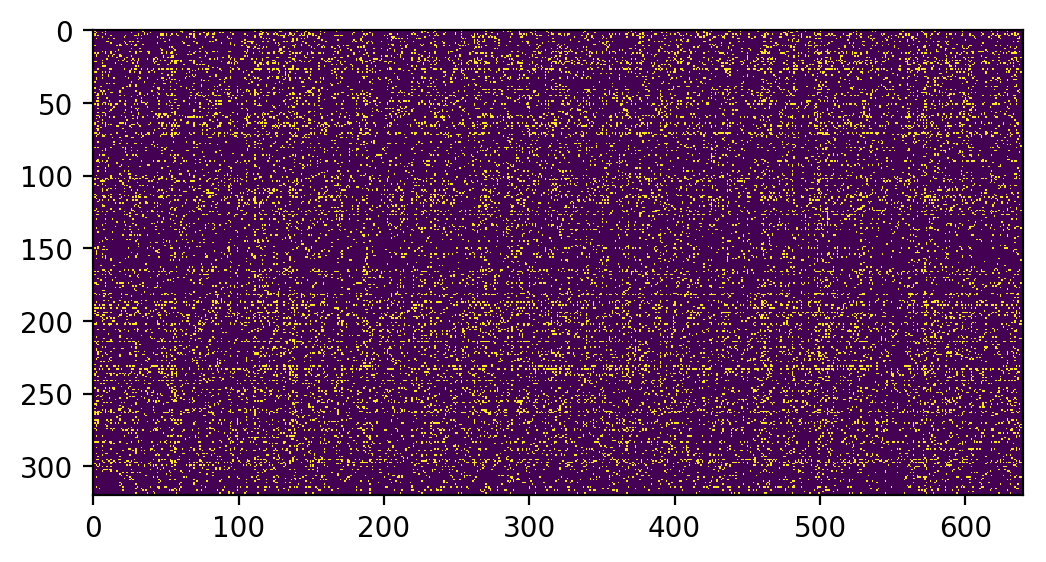

weights shape: (3, 3, 640, 640)


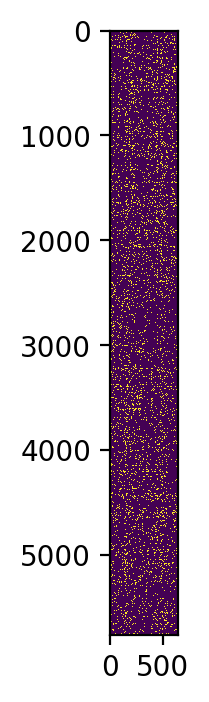

weights shape: (3, 3, 640, 640)


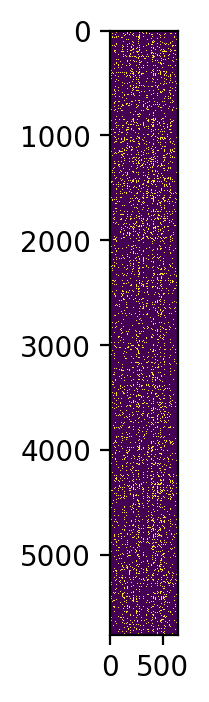

weights shape: (3, 3, 640, 640)


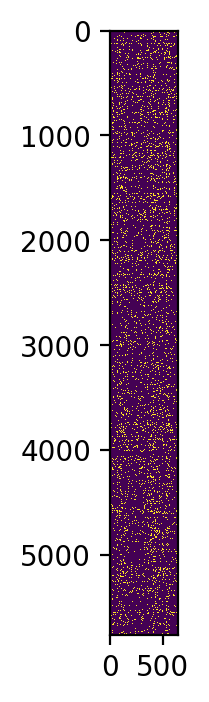

weights shape: (3, 3, 640, 640)


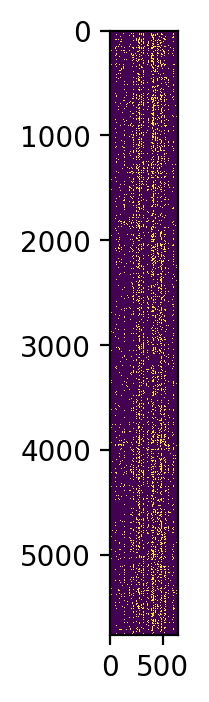

weights shape: (3, 3, 640, 640)


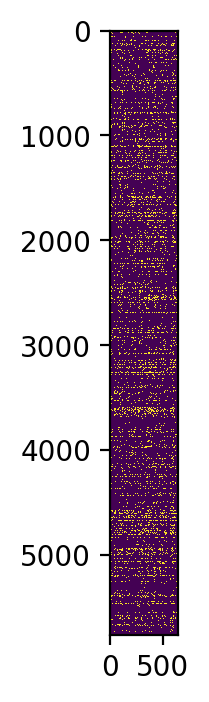

weights shape: (3, 3, 640, 640)


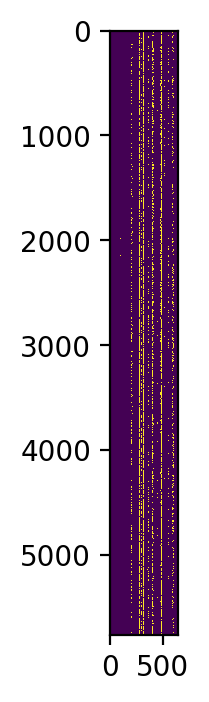

In [95]:
for key in weights_map.keys():
    w = weights_map[key]
    print("weights shape: {0}".format(w.shape))
    och = w.shape[-1]
    mat = w.reshape(-1, och)
    mask = mat != 0
    plt.figure(dpi=200)
    plt.imshow(mask)
    plt.show()
    plt.close()

In [15]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv_first (Conv2D)             (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
stage1_0_bn0 (BatchNormalizatio (None, 32, 32, 16)   64          conv_first[0][0]                 
__________________________________________________________________________________________________
stage1_0_act0 (Activation)      (None, 32, 32, 16)   0           stage1_0_bn0[0][0]               
__________________________________________________________________________________________________
stage1_0_c